<h1>Clustering</h1>
<ul>
    <li><a href="#1" style="text-decoration: none;">Content</a></li>
    <li><a href="#2" style="text-decoration: none;">What data we used?</a></li>
    <li>
        <ul>
            <li><a href="#3" style="text-decoration: none;">Load Python libray and data</a></li>
            <li><a href="#4" style="text-decoration: none;">Data Analysis</a></li>
            <li><a href="#5" style="text-decoration: none;">Fit the cluster model</a></li>
            <li><a href="#6" style="text-decoration: none;">Conclution</a></li>
        </ul>
    </li>
</ul>

<h3 id='1'>Content</h3>
<p>You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.</p>

<p><b>Problem Statement</b></p>
<p>You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.</p>

<h3 id='2'>Is data avaiable?</h3>
<p>Yes, the data is avaiable in <a href="https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python">Kaggle</a></p>

<h3 id='3'>Load Python libray and data</h3>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
df = pd.read_csv('data.csv')

<h3 id='4'>Data Analysis</h3>

In [59]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
df.shape

(200, 5)

In [61]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [63]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [64]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

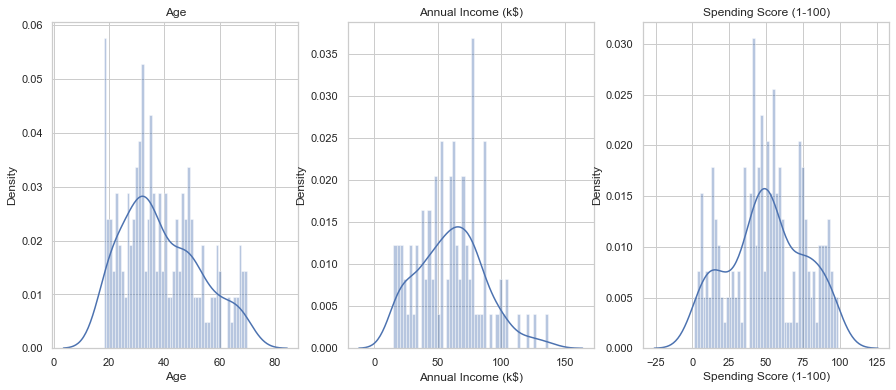

In [65]:
plt.figure(1, figsize=(15,6))
n = 0
for x in df.columns[2:]:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.distplot(df[x], bins=50)
    plt.title(x)

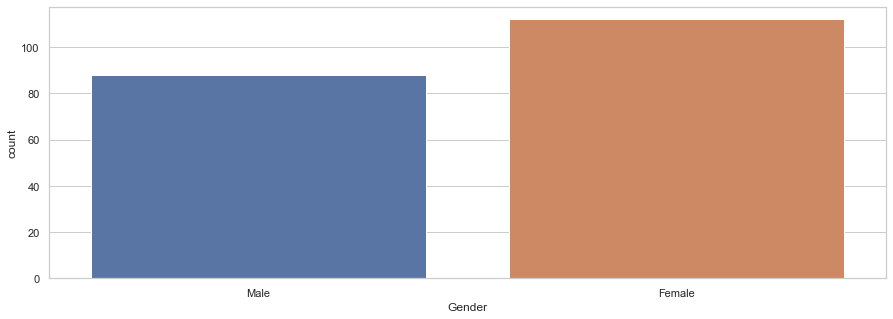

In [66]:
plt.figure(1, figsize=(15,5))
sns.countplot(x='Gender', data=df)
plt.show()

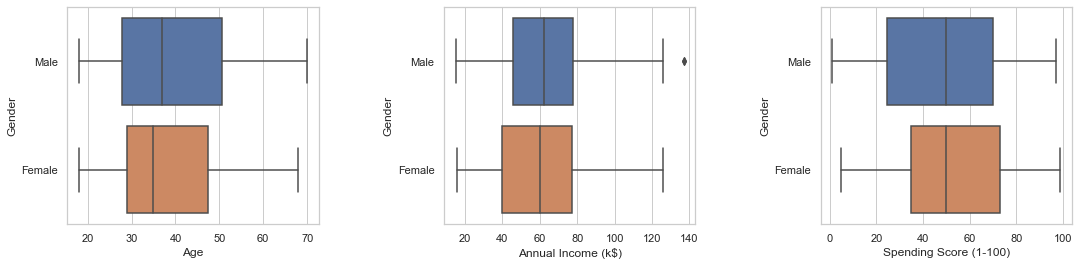

In [67]:
n = 1
plt.figure(1, figsize=(18, 4))
sns.set_theme(style="whitegrid")
for x in df.columns[2:]:
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.boxplot(x=x, y ='Gender', data=df)
    n+=1
plt.show()

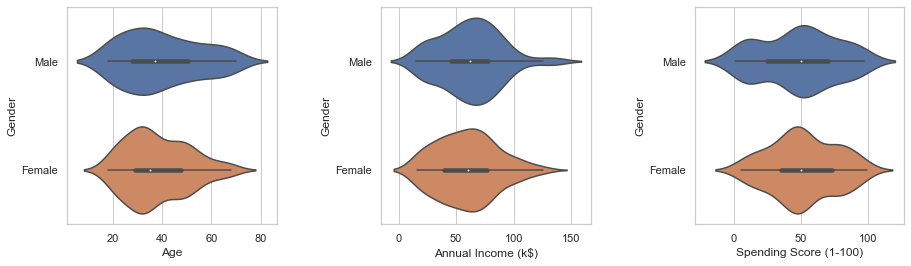

In [68]:
n=1
plt.figure(1, figsize=(15, 4))
for x in df.columns[2:]:
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=x, y ='Gender', data=df)
    n+=1
plt.show()

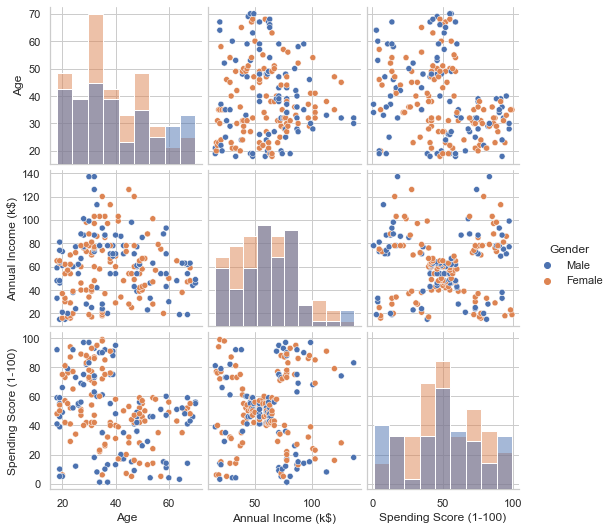

In [69]:
#sns.pairplot(hue='Gender', df[df.columns[2:]],)
data = df.drop(['CustomerID'], axis=1)
sns.pairplot(data, hue='Gender', diag_kind="hist")
plt.show()

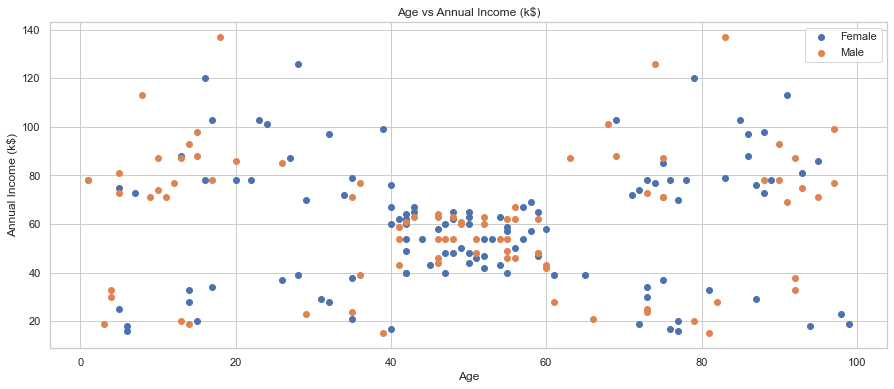

In [70]:
plt.figure(1, figsize=(15,6))
for gender in list(set(df.Gender)):
    plt.scatter(x='Spending Score (1-100)', y = 'Annual Income (k$)', data=df[df.Gender == gender], label=gender)
plt.title('Age vs Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

<h3 id='5'>Fit the cluster model</h3>

In [71]:
X = df[['Age' , 'Spending Score (1-100)']].values
inertial = []
for n in range(1,11):
    algorithm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.001, random_state=111, algorithm='elkan'))
    algorithm.fit(X)
    inertial.append(algorithm.inertia_)

In [72]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

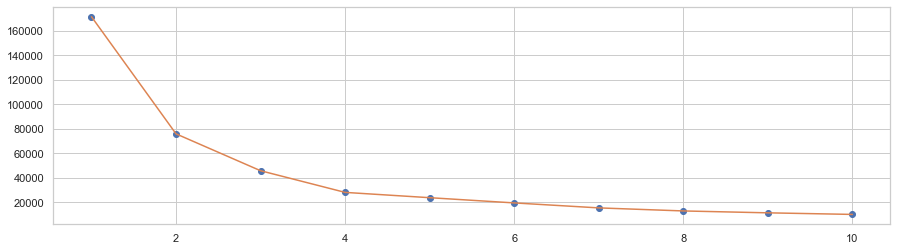

In [73]:
plt.figure(1, figsize=(15, 4))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-')
plt.show()

In [74]:
    algorithm = (KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
    algorithm.fit(X)
    labels1 = algorithm.labels_
    centroids1 = algorithm.cluster_centers_

In [75]:
h = 0.02
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max, h))
Y = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

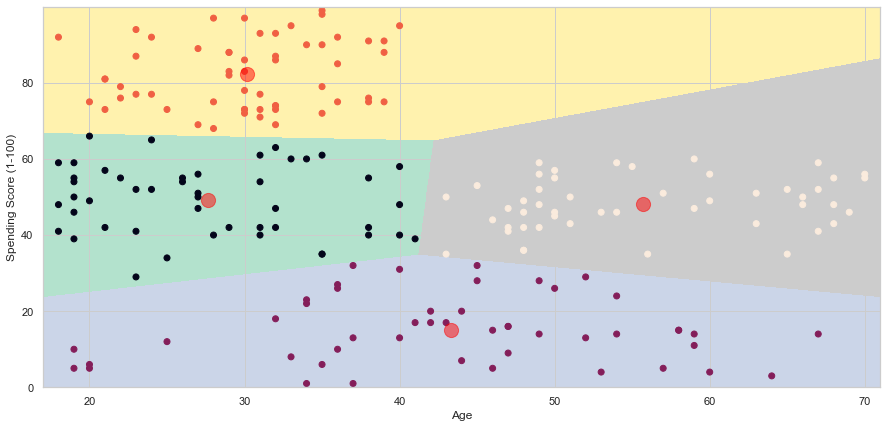

In [77]:
plt.figure(1, figsize=(15,7))
plt.clf()
Y = Y.reshape(xx.shape)
plt.imshow(Y, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
plt.scatter(x='Age', y='Spending Score (1-100)', data=df, c=labels1)
plt.scatter(x=centroids1[:,0], y = centroids1[:,1], s=200, c = 'red', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [78]:
X = df[['Annual Income (k$)' , 'Spending Score (1-100)']].values
inertia = []
for n in range(1,11):
    algorithm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,
                        algorithm='elkan'))    
    
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

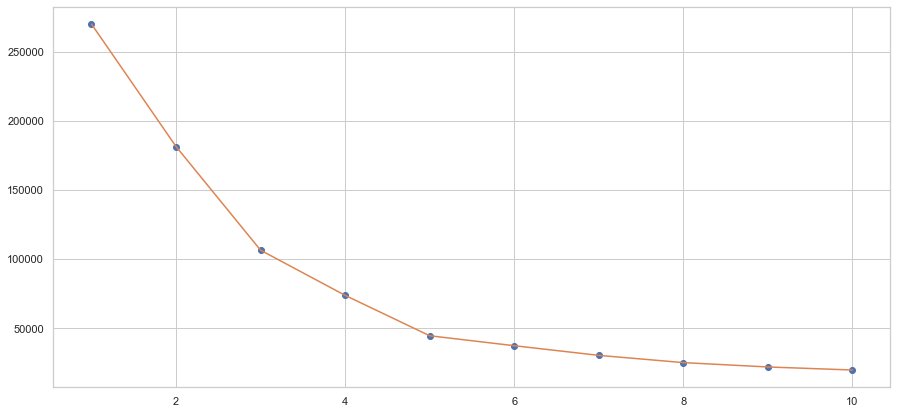

In [79]:
plt.figure(1, figsize=(15,7))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-')
plt.show()

In [80]:
algorithm = (KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
algorithm.fit(X)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [81]:
h = 0.2
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Y = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

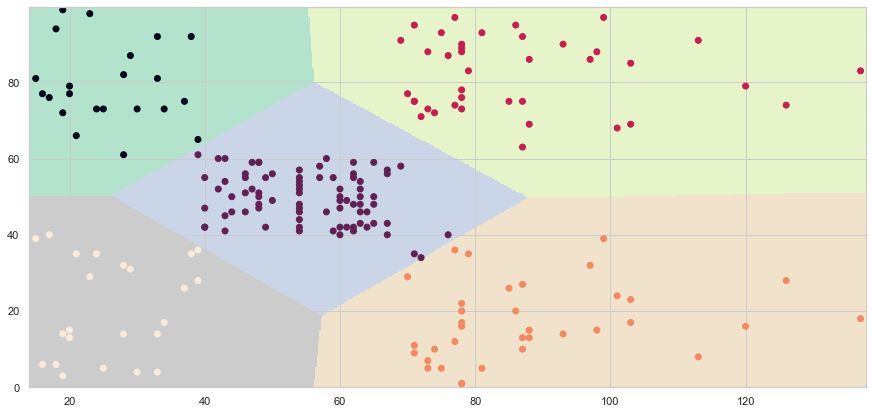

In [82]:
plt.figure(1, figsize=(15, 7))
plt.clf()
Y = Y.reshape(xx.shape)
plt.imshow(Y, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2,
           aspect='auto', origin='lower')
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels2)

plt.show()

In [83]:
X = df[df.columns[2:]].values
inertia = []
for n in range(1,11):
    algorithm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                        random_state=111, algorithm='elkan'))
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

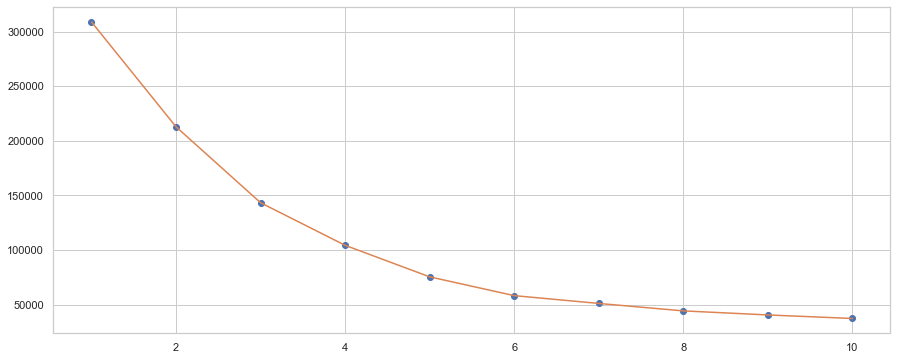

In [84]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-')
plt.show()

In [85]:
algorithm = (KMeans(n_clusters = 6, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
algorithm.fit(X)
labels3 = algorithm.labels_
centroid3 = algorithm.cluster_centers_

In [86]:
df['labels'] = labels3
trace = go.Scatter3d(
    x = df['Age'],
    y = df['Spending Score (1-100)'],
    z = df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['labels'],
        size=10,
        line=dict(color=df['labels'], width=12),
        opacity=0.5
    )
)
data = [trace]
layout= go.Layout(
    title='Cluster',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

<h3 id='6'>Conclusion</h3>
<p>I think, we can create appropriate cluster using <b>Annual Income (k$)</b> and <b>Spending Score (1-100)</b></p>
<b>As we can see:</b>
<ul>
<li>The top left cluster represent low income but high spend</li>
<li>The top right cluster represent high income but high spend</li>
<li>The bottom left cluster represent low income but low spend</li>
<li>The bottom right cluster represent high income but low spend</li>
<li>The Middle cluster represent average income and spend</li>
</ul>

The combination of <b>Age</b>,<b>Annual Income (k$)</b> and <b>Spending Score (1-100)</b> is also perfect to cluster.